In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv('titanic.csv')

In [7]:
df['family'] = df['Parch'] + df['SibSp']
df['survived'] = df['Survived']

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [9]:
df = df[['Age', 'Fare', 'family', 'survived']]

In [10]:
df

,Age,Fare,family,survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,30.0000,0,1


In [11]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.000000
family,0.000000
survived,0.000000


In [12]:
import numpy as np

# total rows in dataframe
n = len(df)

# how many rows should become null (5%)
n_nulls = int(0.05 * n)

# randomly choose indices without repetition
np.random.seed(42)  # optional, makes the randomness reproducible
random_indices = np.random.choice(df.index, size=n_nulls, replace=False)

# introduce nulls in Fare column at those indices
df.loc[random_indices, 'Fare'] = np.nan


In [13]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.049383
family,0.000000
survived,0.000000


In [14]:
x = df.drop(columns=['survived'])
y = df['survived']


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 41, stratify = y)

In [16]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [17]:
x_train['age_mean'] = x_train['Age'].fillna(mean_age)
x_train['age_median'] = x_train['Age'].fillna(median_age)

x_train['fare_mean'] = x_train['Fare'].fillna(mean_fare)
x_train['fare_median'] = x_train['Fare'].fillna(median_fare)


In [18]:
x_train.sample(9)

,Age,Fare,family,age_mean,age_median,fare_mean,fare_median
662,47.0,25.5875,0,47.000000,47.0,25.5875,25.5875
656,NaN,7.8958,0,30.055026,29.0,7.8958,7.8958
89,24.0,8.0500,0,24.000000,24.0,8.0500,8.0500
370,25.0,55.4417,1,25.000000,25.0,55.4417,55.4417
163,17.0,8.6625,0,17.000000,17.0,8.6625,8.6625
862,48.0,25.9292,0,48.000000,48.0,25.9292,25.9292
189,36.0,7.8958,0,36.000000,36.0,7.8958,7.8958
805,31.0,7.7750,0,31.000000,31.0,7.7750,7.7750
313,28.0,7.8958,0,28.000000,28.0,7.8958,7.8958


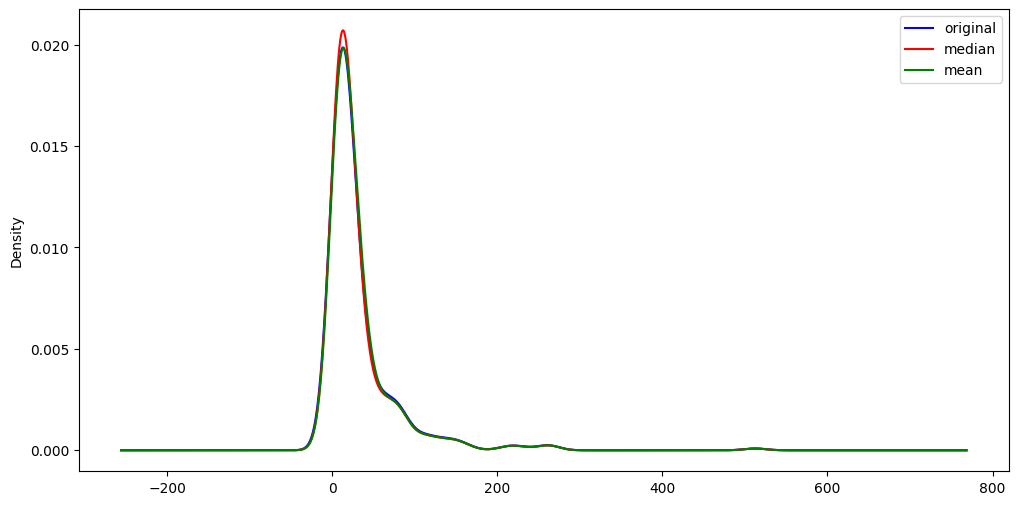

In [19]:
fig = plt.figure(figsize=(12, 6))
ax  = fig.add_subplot(111)

# og variable distribution
x_train['Fare'].plot(kind = 'kde', ax = ax, color = 'b', label = 'original')

# varible imputed with median
x_train['fare_median'].plot(kind = 'kde', ax = ax, color = 'r', label = 'median')

# variable imputed with mean
x_train['fare_mean'].plot(kind = 'kde', ax = ax, color = 'g', label = 'mean')

# legends
lines, lables = ax.get_legend_handles_labels()
ax.legend(lines, lables, loc = 'best')

In [20]:
x_train.cov()

,Age,Fare,family,age_mean,age_median,fare_mean,fare_median
Age,209.719269,77.752332,-5.665340,209.719269,209.719269,75.085365,78.686351
Fare,77.752332,2391.695053,18.856139,62.939203,64.934325,2391.695053,2391.695053
family,-5.665340,18.856139,2.491314,-4.541834,-4.512805,18.034000,18.220610
age_mean,209.719269,62.939203,-4.541834,168.129371,168.129371,60.195019,63.081885
age_median,209.719269,64.934325,-4.512805,168.129371,168.306395,62.103152,65.039622
fare_mean,75.085365,2391.695053,18.034000,60.195019,62.103152,2287.415803,2287.415803
fare_median,78.686351,2391.695053,18.220610,63.081885,65.039622,2287.415803,2300.871949


# **using sklearn**

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 41, stratify = y)

In [22]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [25]:
trf = ColumnTransformer([
    ('age_imputer', imputer1, ['Age']),
    ('fare_imputer', imputer2, ['Fare'])
], remainder='passthrough')

In [26]:
trf.fit(x_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('age_imputer', SimpleImputer(), ['Age']),
                                ('fare_imputer',
                                 SimpleImputer(strategy='median'), ['Fare'])])

In [27]:
x_train = trf.transform(x_train)
x_test  = trf.transform(x_test)

In [28]:
x_train

array([[34.        , 32.5       ,  2.        ],
       [17.        , 14.4583    ,  0.        ],
       [30.        ,  7.8958    ,  0.        ],
       ...,
       [19.        ,  7.65      ,  0.        ],
       [30.05502627, 27.7208    ,  0.        ],
       [26.        , 56.4958    ,  0.        ]])